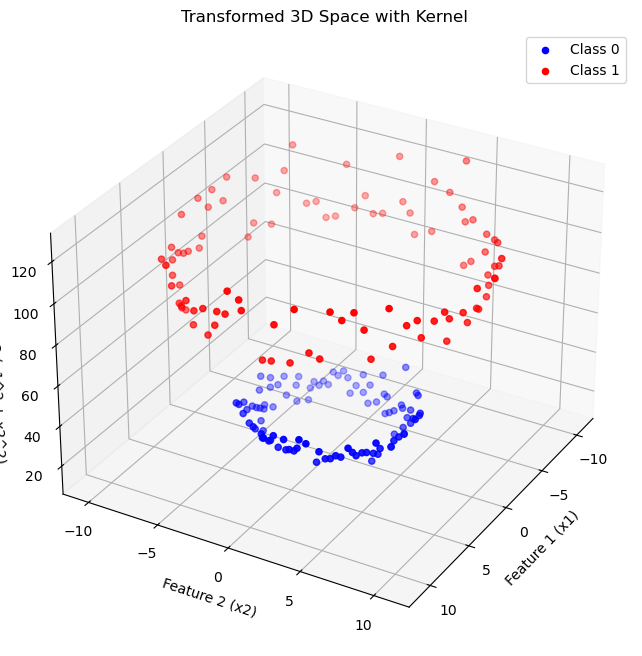

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a 2D dataset with two classes forming concentric circles
np.random.seed(0)
n_samples = 100
r_inner = 5 + np.random.randn(n_samples) * 0.5
r_outer = 10 + np.random.randn(n_samples) * 0.5

theta_inner = np.linspace(0, 2*np.pi, n_samples)
theta_outer = np.linspace(0, 2*np.pi, n_samples)

x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

# Transform the data into 3D using a kernel-like transformation
z_inner = x_inner**2 + y_inner**2
z_outer = x_outer**2 + y_outer**2

# Plot the transformed 3D dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_inner, y_inner, z_inner, color='blue', label='Class 0')
ax.scatter(x_outer, y_outer, z_outer, color='red', label='Class 1')
ax.set_title("Transformed 3D Space with Kernel")
ax.set_xlabel("Feature 1 (x1)")
ax.set_ylabel("Feature 2 (x2)")
ax.set_zlabel("Feature 3 (x1^2 + x2^2)")
ax.view_init(elev=30, azim=30)
plt.legend()
plt.show()

Classifier Visualization Playground

The purpose of this notebook is to let you visualize various classsifiers' decision boundaries.

The data used in this notebook is based on the UCI Mushroom Data Set stored in mushrooms.csv.

In order to better vizualize the decision boundaries, we'll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

1. Importing Libraries
2. Loading the Data
3. One-Hot Encoding the Data: 

    3.1 get_dummies converts categorical variables into a binary (0 or 1) format. Each unique value in a categorical feature becomes a new column.

    3.2 For example, if the dataset has a column “color” with values “red”, “green”, and “blue”, get_dummies would create three new columns: “color_red”, “color_green”, and “color_blue”, with binary values indicating the presence of each color.

4. Sampling a Subset of the Data:

	4.1 This line randomly selects 8% of the rows from df2 and stores them in df3.

	4.2 This is likely done to reduce the dataset size for faster processing during the PCA and plotting.

5. Splitting Features and Target: 

	5.1 X: The feature matrix, containing all columns except the first two. The iloc[:,2:] slices the DataFrame, selecting all columns from the third one onwards.

	5.2 y: The target variable, which is assumed to be in the second column (index 1) of df3.(which is likely the column indicating whether a mushroom is edible or poisonous).

6. Applying Principal Component Analysis (PCA):

	6.1 PCA is applied to X to reduce its dimensionality from the original number of features to just two principal components.

	6.2 fit_transform performs PCA and returns a new matrix with two columns representing the two principal components.

7. Splitting Data into Training and Testing Sets:

	7.1 The data is split into training and testing sets. train_test_split splits the pca matrix (features) and y (target) into X_train, X_test, y_train, and y_test.

	7.2 random_state=0 ensures that the split is reproducible.

8. Plotting the Data: 
 	8.1 Creating the Plot: A new figure is created with a resolution set by dpi=120. 

	8.2 Plotting Edible Mushrooms: The first scatter plot displays mushrooms labeled as Edible (where y.values==0) using the first and second principal components.

	8.3 Plotting Poisonous Mushrooms: The second scatter plot displays mushrooms labeled as Poisonous (where y.
	values==1), again using the first and second principal components.

	8.4 Customizing the Plot:

	8.5 alpha=0.5 makes the points semi-transparent.

	8.6 label specifies the legend entry for each scatter plot.

	8.7 s=2 sets the size of the scatter plot points.

	8.8 Adding Labels: xlabel and ylabel label the axes as PC1 and PC2 (Principal Component 1 and 2).

	8.9 Aspect Ratio: set_aspect('equal') ensures that both axes are scaled equally, so that circles are represented as circles and not ellipses.
	
	8.10 Showing the Plot: Finally, plt.show() displays the plot.

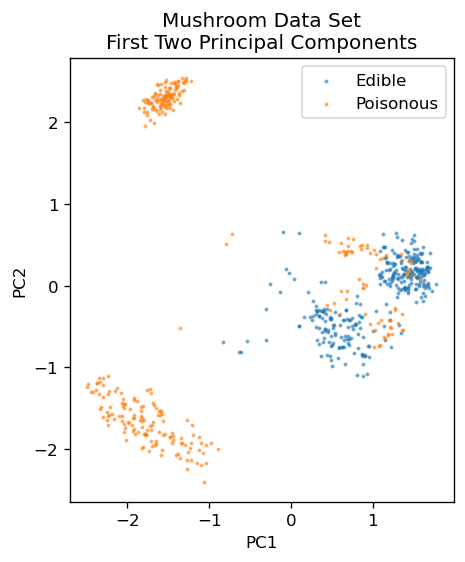

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/mushrooms.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')